In [5]:
# Install Required Libraries

# tweepy: Python library to interact with Twitter API.

# pandas, matplotlib, seaborn: For data handling and visualization.

# textblob: For simple sentiment analysis.

# nltk: For natural language processing tasks like tokenization and lemmatization.

# wordcloud: To create word cloud visualizations.
!pip install tweepy textblob matplotlib pandas nltk wordcloud


In [39]:
# Import Libraries
import tweepy
import pandas as pd
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\santa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\santa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\santa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Authenticate Twitter API

# Twitter API credentials (replace with your own)
API_KEY = 'CqjtEAoKF3EFmA4RC2cTAJOri'
API_SECRET = 'DdYR1p7tMGq9QucTv0A12MjmDF1UIykxTV4YIqXIaA7L5jRgqE'
ACCESS_TOKEN = '1941172004096495616-e2UEMsANcpH1IKqN7Bt0wg7yG5cCAm'
ACCESS_TOKEN_SECRET = 'wgOobOhL6VjqrLUtyUkZeRR7JV5jakSXcUVtn12qossZh'

# Authenticate to Twitter
# Authentication: You provide your Twitter API keys and tokens to authenticate your app with Twitter, allowing you to access live tweet data.
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)

In [41]:
# Collect Live Tweets

# The function get_tweets uses Tweepy's Cursor to fetch recent tweets containing a specific keyword (e.g., "vaccine"). 
# It excludes retweets to avoid duplicates and collects a specified number of tweets.
def get_tweets(keyword, count=100):
    tweets = []
    for tweet in tweepy.Cursor(api.search_tweets,
                               q=keyword + " -filter:retweets",
                               lang="en",
                               tweet_mode='extended').items(count):
        tweets.append(tweet.full_text)
    return tweets



In [42]:
# Preprocess Tweets

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower() # Convert text to lowercase.
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)     # remove mentions
    text = re.sub(r'[^a-z\s]', '', text) # remove punctuation and numbers
    tokens = nltk.word_tokenize(text)  # Tokenize text into words.
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words] # Lemmatize words to their root form (e.g., "running" to "run").
    return " ".join(tokens)

In [43]:
import tweepy

BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAJaj2wEAAAAAMZJt8NEoGPN4RUG4FPv8NEoawUw%3DtRRNYjWRANKUtTc704UGDroQiCej45FUtZSytwLbCTJIuFfxdw'

client = tweepy.Client(bearer_token=BEARER_TOKEN)

response = client.search_recent_tweets(query="vaccine -is:retweet", max_results=100)
tweets = [tweet.text for tweet in response.data]
print(f"Collected {len(tweets)} tweets")


Collected 100 tweets


In [45]:
import nltk
nltk.download('punkt_tab')
cleaned_tweets = [preprocess_text(tweet) for tweet in tweets]
print(cleaned_tweets[:5])


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\santa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


['vaccine laga lo aik aur thora speed ho jaega process', 'time history government attacked freedom liberty forced people take deadly shot rushed vaccine combat disease bit powerful common cold pitted citizen opened', 'vaccine injured lost loved one vaccine outright militant inhuman asshole refused get vaccine refusing listen cant say anything dont want treated way treated others', 'exactly never got called vaccine virus cure like flu', 'anti aging use karta hoga slim rehne ka goli khata hoga life style issue hoga bring government declared vaccine nothing sudden death give clarification']


In [46]:
# Sentiment Classification Using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

sentiments = [get_sentiment(tweet) for tweet in cleaned_tweets]

# Create DataFrame
df = pd.DataFrame({'tweet': tweets, 'cleaned_tweet': cleaned_tweets, 'sentiment': sentiments})
df.head()



,tweet,cleaned_tweet,sentiment
0,@ayshestt Vaccine laga lo aik aur thora speed ...,vaccine laga lo aik aur thora speed ho jaega p...,Neutral
1,There was a time in our history where our Gove...,time history government attacked freedom liber...,Negative
2,@jadedraven4 @MdBreathe @SecKennedy Before the...,vaccine injured lost loved one vaccine outrigh...,Positive
3,@TheMamaBearCan @TheCatAtonic @goddeketal Exac...,exactly never got called vaccine virus cure li...,Negative
4,@Benarasiyaa Anti aging use karta hoga\nSlim r...,anti aging use karta hoga slim rehne ka goli k...,Neutral


C:\Users\santa\AppData\Local\Temp\ipykernel_5596\3136702596.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


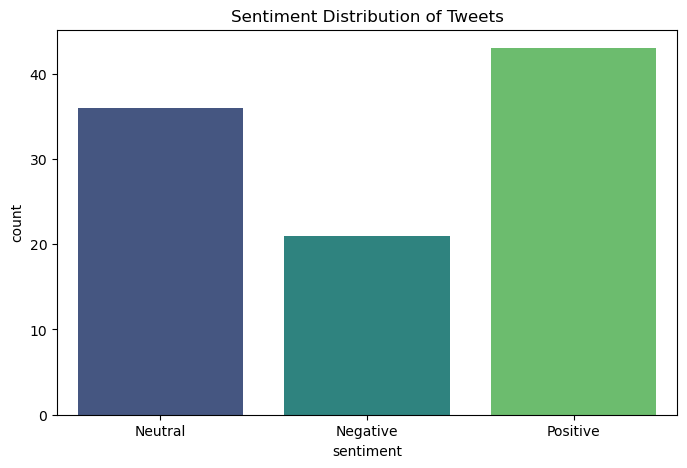

In [47]:
# Visualize Sentiment Distribution
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution of Tweets')
plt.show()


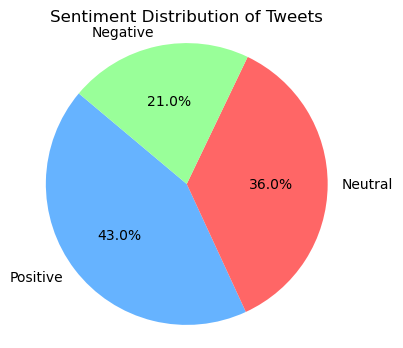

In [53]:
# Visualize Sentiment Distribution
# pie chart
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame with a 'sentiment' column
# If you don't have 'df' from the previous steps, you can create a sample:
# data = {'sentiment': ['Positive', 'Negative', 'Positive', 'Neutral', 'Negative', 'Positive', 'Neutral']}
# df = pd.DataFrame(data)

# Calculate the counts of each sentiment category
sentiment_counts = df['sentiment'].value_counts()

# Create a DataFrame from the counts for plotting
sentiment_df_for_plot = pd.DataFrame(sentiment_counts).reset_index()
sentiment_df_for_plot.columns = ['Sentiment', 'Count']

# Pie chart plotting code
plt.figure(figsize=(4,4)) # Set the figure size for better visualization
plt.pie(sentiment_df_for_plot['Count'],         # Data to plot (counts of sentiments)
        labels=sentiment_df_for_plot['Sentiment'], # Labels for each slice (Positive, Negative, Neutral)
        autopct='%1.1f%%',                      # Format for displaying percentages on slices
        startangle=140,                         # Starting angle for the first slice
        colors=['#66b3ff','#ff6666','#99ff99']  # Custom colors for slices (light blue, red, green)
       )
plt.title('Sentiment Distribution of Tweets') # Title of the pie chart
plt.axis('equal')  # Ensures that the pie chart is drawn as a perfect circle.
plt.show() # Display the plot


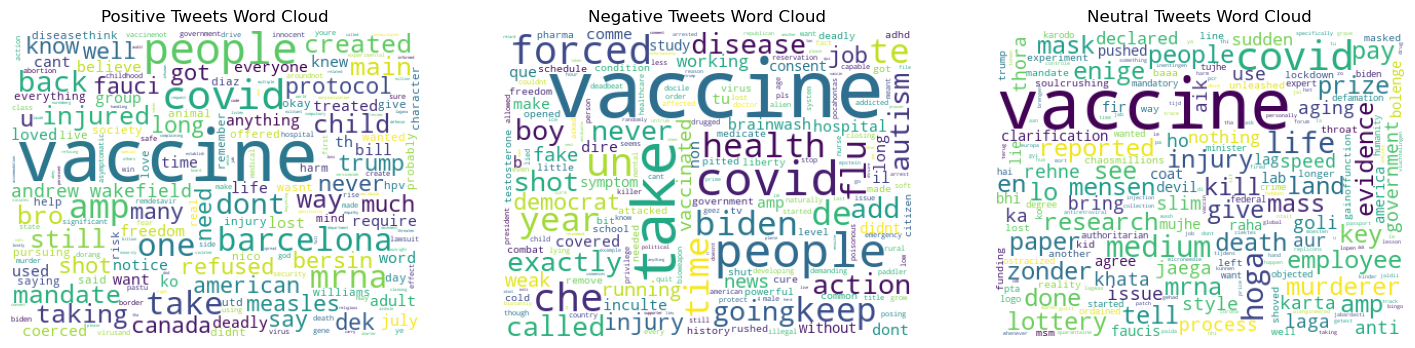

In [48]:
# Visualize Word Clouds by Sentiment
positive_text = " ".join(df[df.sentiment=='Positive']['cleaned_tweet'])
negative_text = " ".join(df[df.sentiment=='Negative']['cleaned_tweet'])
neutral_text = " ".join(df[df.sentiment=='Neutral']['cleaned_tweet'])

fig, axes = plt.subplots(1, 3, figsize=(18,6))

wc_pos = WordCloud(width=400, height=300, background_color='white').generate(positive_text)
axes[0].imshow(wc_pos)
axes[0].set_title('Positive Tweets Word Cloud')
axes[0].axis('off')

wc_neg = WordCloud(width=400, height=300, background_color='white').generate(negative_text)
axes[1].imshow(wc_neg)
axes[1].set_title('Negative Tweets Word Cloud')
axes[1].axis('off')

wc_neu = WordCloud(width=400, height=300, background_color='white').generate(neutral_text)
axes[2].imshow(wc_neu)
axes[2].set_title('Neutral Tweets Word Cloud')
axes[2].axis('off')

plt.show()
